In [34]:
#Importar el dataset y visualizarlo
import pandas as pd

df = pd.read_csv('../data/dataset_perfiles.csv', sep=',', header=0, encoding='utf-8')
df.head(3)

,Marca temporal,¿Cuál es tu rango de edad?,¿Con qué género te identificas?,¿Cuál es tu situación laboral actual?,¿Qué dispositivos tecnológicos usas con frecuencia?,¿Cuáles son tus principales actividades en internet?,¿Cuál es tu principal medio para conectarte a internet?,¿Qué valoras más en un servicio de telecomunicaciones?,¿Qué marcas de tecnología prefieres?,¿Cómo te defines en tu estilo de vida?
0,2025/04/16 4:51:06 p.m. GMT-5,36-50 años,Masculino,Empleado/a de empresa privada,Smartphone,"Redes sociales (Instagram, TikTok, etc.);Traba...",Datos móviles (celular),Velocidad de conexión,Samsung,Social/conectado con amigos y familia
1,2025/04/16 4:52:15 p.m. GMT-5,18-25 años,Femenino,Estudiante,Smartphone;Laptop,"Trabajo/Estudio;Entretenimiento (streaming, vi...",Wi-Fi en casa,Precios bajos,Samsung,Práctico/busca lo esencial
2,2025/04/16 4:55:21 p.m. GMT-5,26-35 años,Femenino,Dueño/a de negocio,Smartphone;Laptop;Tablet,"Redes sociales (Instagram, TikTok, etc.);Traba...",Datos móviles (celular),Velocidad de conexión,Apple,Ahorrador/consciente de gastos


In [35]:
#Modificar el nombre de las columnas del encabezado
df.columns = ['fecha', 'edad', 'genero', 'sit_laboral', 'disp_mas_usados', 'act_internet', 'conex_internet', 'car_valorada', 'marca_pref', 'est_vida']
df.head(3)

,fecha,edad,genero,sit_laboral,disp_mas_usados,act_internet,conex_internet,car_valorada,marca_pref,est_vida
0,2025/04/16 4:51:06 p.m. GMT-5,36-50 años,Masculino,Empleado/a de empresa privada,Smartphone,"Redes sociales (Instagram, TikTok, etc.);Traba...",Datos móviles (celular),Velocidad de conexión,Samsung,Social/conectado con amigos y familia
1,2025/04/16 4:52:15 p.m. GMT-5,18-25 años,Femenino,Estudiante,Smartphone;Laptop,"Trabajo/Estudio;Entretenimiento (streaming, vi...",Wi-Fi en casa,Precios bajos,Samsung,Práctico/busca lo esencial
2,2025/04/16 4:55:21 p.m. GMT-5,26-35 años,Femenino,Dueño/a de negocio,Smartphone;Laptop;Tablet,"Redes sociales (Instagram, TikTok, etc.);Traba...",Datos móviles (celular),Velocidad de conexión,Apple,Ahorrador/consciente de gastos


In [36]:
#Mostrar en una tabla el número de clientes por categoría de edad
cantidad = df['edad'].value_counts().to_frame()
proporcion = df['edad'].value_counts(normalize=True)

edades = pd.concat([cantidad, proporcion], axis=1)
edades

,count,proportion
edad,,
18-25 años,24,0.533333
36-50 años,7,0.155556
Más de 50 años,7,0.155556
26-35 años,6,0.133333
Menos de 18 años,1,0.022222


In [37]:
#Eliminar la columna "fecha" del dataset
df.drop(columns=['fecha'], inplace=True)
df.head(3)

,edad,genero,sit_laboral,disp_mas_usados,act_internet,conex_internet,car_valorada,marca_pref,est_vida
0,36-50 años,Masculino,Empleado/a de empresa privada,Smartphone,"Redes sociales (Instagram, TikTok, etc.);Traba...",Datos móviles (celular),Velocidad de conexión,Samsung,Social/conectado con amigos y familia
1,18-25 años,Femenino,Estudiante,Smartphone;Laptop,"Trabajo/Estudio;Entretenimiento (streaming, vi...",Wi-Fi en casa,Precios bajos,Samsung,Práctico/busca lo esencial
2,26-35 años,Femenino,Dueño/a de negocio,Smartphone;Laptop;Tablet,"Redes sociales (Instagram, TikTok, etc.);Traba...",Datos móviles (celular),Velocidad de conexión,Apple,Ahorrador/consciente de gastos


In [38]:
#Tipos de dispositivos más usados por los clientes
df['disp_mas_usados'].unique()

array(['Smartphone', 'Smartphone;Laptop', 'Smartphone;Laptop;Tablet',
       'Smartphone;Laptop;Smart TV', 'Laptop;Smart TV',
       'Smartphone;Laptop;Smart TV;PC',
       'Smartphone;Laptop;Smart TV;Consola de videojuegos',
       'Smartphone;Laptop;Tablet;Consola de videojuegos', 'Smart TV',
       'Smartphone;Laptop;PC de escritorio',
       'Smartphone;Consola de videojuegos;PC', 'Laptop',
       'Smartphone;Smart TV;Consola de videojuegos;Pc'], dtype=object)

In [39]:
#Modificar los valores de la columna "disp_mas_usados" iguales a "Smartphone;Laptop;PC de escritorio"
#a "Smartphone;Laptop;PC"
df['disp_mas_usados'] = df['disp_mas_usados'].replace('Smartphone;Laptop;PC de escritorio', 'Smartphone;Laptop;PC')

#Modificar los valores de la columna "disp_mas_usados" iguales a "Consola de videojuegos;Pc"
#a "Consola de videojuegos;PC"
df['disp_mas_usados'] = df['disp_mas_usados'].replace('Smartphone;Smart TV;Consola de videojuegos;Pc', 'Smartphone;Smart TV;Consola de videojuegos;PC')

df['disp_mas_usados'].unique()

array(['Smartphone', 'Smartphone;Laptop', 'Smartphone;Laptop;Tablet',
       'Smartphone;Laptop;Smart TV', 'Laptop;Smart TV',
       'Smartphone;Laptop;Smart TV;PC',
       'Smartphone;Laptop;Smart TV;Consola de videojuegos',
       'Smartphone;Laptop;Tablet;Consola de videojuegos', 'Smart TV',
       'Smartphone;Laptop;PC', 'Smartphone;Consola de videojuegos;PC',
       'Laptop', 'Smartphone;Smart TV;Consola de videojuegos;PC'],
      dtype=object)

In [40]:
# Crear una columna para cada tipo de dispositivo usado: Smartphone, Laptop, Tablet, PC, 
# Consola de videojuegos y Smart TV y asignar 1 si el cliente usa ese dispositivo y 0 si no lo usa
df['Smartphone'] = df['disp_mas_usados'].apply(lambda x: 1 if 'Smartphone' in x else 0)
df['Laptop'] = df['disp_mas_usados'].apply(lambda x: 1 if 'Laptop' in x else 0)
df['Tablet'] = df['disp_mas_usados'].apply(lambda x: 1 if 'Tablet' in x else 0)
df['PC'] = df['disp_mas_usados'].apply(lambda x: 1 if 'PC' in x else 0)
df['Consola de videojuegos'] = df['disp_mas_usados'].apply(lambda x: 1 if 'Consola de videojuegos' in x else 0)
df['Smart TV'] = df['disp_mas_usados'].apply(lambda x: 1 if 'Smart TV' in x else 0)

df.head(3)

,edad,genero,sit_laboral,disp_mas_usados,act_internet,conex_internet,car_valorada,marca_pref,est_vida,Smartphone,Laptop,Tablet,PC,Consola de videojuegos,Smart TV
0,36-50 años,Masculino,Empleado/a de empresa privada,Smartphone,"Redes sociales (Instagram, TikTok, etc.);Traba...",Datos móviles (celular),Velocidad de conexión,Samsung,Social/conectado con amigos y familia,1,0,0,0,0,0
1,18-25 años,Femenino,Estudiante,Smartphone;Laptop,"Trabajo/Estudio;Entretenimiento (streaming, vi...",Wi-Fi en casa,Precios bajos,Samsung,Práctico/busca lo esencial,1,1,0,0,0,0
2,26-35 años,Femenino,Dueño/a de negocio,Smartphone;Laptop;Tablet,"Redes sociales (Instagram, TikTok, etc.);Traba...",Datos móviles (celular),Velocidad de conexión,Apple,Ahorrador/consciente de gastos,1,1,1,0,0,0


In [41]:
# Eliminar la columna "disp_mas_usados" del dataset
df.drop(columns=['disp_mas_usados'], inplace=True)

df.head(3)

,edad,genero,sit_laboral,act_internet,conex_internet,car_valorada,marca_pref,est_vida,Smartphone,Laptop,Tablet,PC,Consola de videojuegos,Smart TV
0,36-50 años,Masculino,Empleado/a de empresa privada,"Redes sociales (Instagram, TikTok, etc.);Traba...",Datos móviles (celular),Velocidad de conexión,Samsung,Social/conectado con amigos y familia,1,0,0,0,0,0
1,18-25 años,Femenino,Estudiante,"Trabajo/Estudio;Entretenimiento (streaming, vi...",Wi-Fi en casa,Precios bajos,Samsung,Práctico/busca lo esencial,1,1,0,0,0,0
2,26-35 años,Femenino,Dueño/a de negocio,"Redes sociales (Instagram, TikTok, etc.);Traba...",Datos móviles (celular),Velocidad de conexión,Apple,Ahorrador/consciente de gastos,1,1,1,0,0,0


In [ ]:
#Tipos de actividad más realizada por los clientes
df['act_internet'].unique()

array(['Redes sociales (Instagram, TikTok, etc.);Trabajo/Estudio',
       'Trabajo/Estudio;Entretenimiento (streaming, videos, música);Juegos en línea',
       'Trabajo/Estudio',
       'Redes sociales (Instagram, TikTok, etc.);Trabajo/Estudio;Entretenimiento (streaming, videos, música)',
       'Redes sociales (Instagram, TikTok, etc.);Trabajo/Estudio;Entretenimiento (streaming, videos, música);Compras online;Juegos en línea',
       'Redes sociales (Instagram, TikTok, etc.)',
       'Redes sociales (Instagram, TikTok, etc.);Trabajo/Estudio;Juegos en línea',
       'Redes sociales (Instagram, TikTok, etc.);Trabajo/Estudio;Entretenimiento (streaming, videos, música);Juegos en línea',
       'Trabajo/Estudio;Entretenimiento (streaming, videos, música)',
       'Redes sociales (Instagram, TikTok, etc.);Compras online',
       'Redes sociales (Instagram, TikTok, etc.);Trabajo/Estudio;Entretenimiento (streaming, videos, música);Compras online',
       'Redes sociales (Instagram, TikTok, et

In [43]:
# Crear una columna para cada tipo de actividad más realizada por los clientes: Redes sociales 
# (Instagram, TikTok, etc.), Trabajo/Estudio, Entretenimiento (streaming, videos, música),
# Juegos en línea, Compras online y asignar 1 si el cliente realiza esa actividad y 0 si no la realiza
df['Redes sociales'] = df['act_internet'].apply(lambda x: 1 if 'Redes sociales (Instagram, TikTok, etc.)' in x else 0)
df['Trabajo/Estudio'] = df['act_internet'].apply(lambda x: 1 if 'Trabajo/Estudio' in x else 0)
df['Entretenimiento'] = df['act_internet'].apply(lambda x: 1 if 'Entretenimiento (streaming, videos, música)' in x else 0)
df['Juegos en línea'] = df['act_internet'].apply(lambda x: 1 if 'Juegos en línea' in x else 0)
df['Compras online'] = df['act_internet'].apply(lambda x: 1 if 'Compras online' in x else 0)

df.head(3)

,edad,genero,sit_laboral,act_internet,conex_internet,car_valorada,marca_pref,est_vida,Smartphone,Laptop,Tablet,PC,Consola de videojuegos,Smart TV,Redes sociales,Trabajo/Estudio,Entretenimiento,Juegos en línea,Compras online
0,36-50 años,Masculino,Empleado/a de empresa privada,"Redes sociales (Instagram, TikTok, etc.);Traba...",Datos móviles (celular),Velocidad de conexión,Samsung,Social/conectado con amigos y familia,1,0,0,0,0,0,1,1,0,0,0
1,18-25 años,Femenino,Estudiante,"Trabajo/Estudio;Entretenimiento (streaming, vi...",Wi-Fi en casa,Precios bajos,Samsung,Práctico/busca lo esencial,1,1,0,0,0,0,0,1,1,1,0
2,26-35 años,Femenino,Dueño/a de negocio,"Redes sociales (Instagram, TikTok, etc.);Traba...",Datos móviles (celular),Velocidad de conexión,Apple,Ahorrador/consciente de gastos,1,1,1,0,0,0,1,1,0,0,0


In [44]:
# Eliminar la columna "act_internet" del dataset
df.drop(columns=['act_internet'], inplace=True)

df.head(3)

,edad,genero,sit_laboral,conex_internet,car_valorada,marca_pref,est_vida,Smartphone,Laptop,Tablet,PC,Consola de videojuegos,Smart TV,Redes sociales,Trabajo/Estudio,Entretenimiento,Juegos en línea,Compras online
0,36-50 años,Masculino,Empleado/a de empresa privada,Datos móviles (celular),Velocidad de conexión,Samsung,Social/conectado con amigos y familia,1,0,0,0,0,0,1,1,0,0,0
1,18-25 años,Femenino,Estudiante,Wi-Fi en casa,Precios bajos,Samsung,Práctico/busca lo esencial,1,1,0,0,0,0,0,1,1,1,0
2,26-35 años,Femenino,Dueño/a de negocio,Datos móviles (celular),Velocidad de conexión,Apple,Ahorrador/consciente de gastos,1,1,1,0,0,0,1,1,0,0,0


In [45]:
# Crear un dataframe para cada grupo de edad
df_menos_18 = df[df['edad'] == 'Menos de 18 años']
df_18_25 = df[df['edad'] == '18-25 años']
df_26_35 = df[df['edad'] == '26-35 años']
df_36_50 = df[df['edad'] == '36-50 años']
df_51_mas = df[df['edad'] == 'Más de 50 años']

df_menos_18.head(3)

,edad,genero,sit_laboral,conex_internet,car_valorada,marca_pref,est_vida,Smartphone,Laptop,Tablet,PC,Consola de videojuegos,Smart TV,Redes sociales,Trabajo/Estudio,Entretenimiento,Juegos en línea,Compras online
42,Menos de 18 años,Masculino,Estudiante,Wi-Fi en casa,Velocidad de conexión,Samsung,Práctico/busca lo esencial,1,0,0,1,1,1,0,1,1,1,0


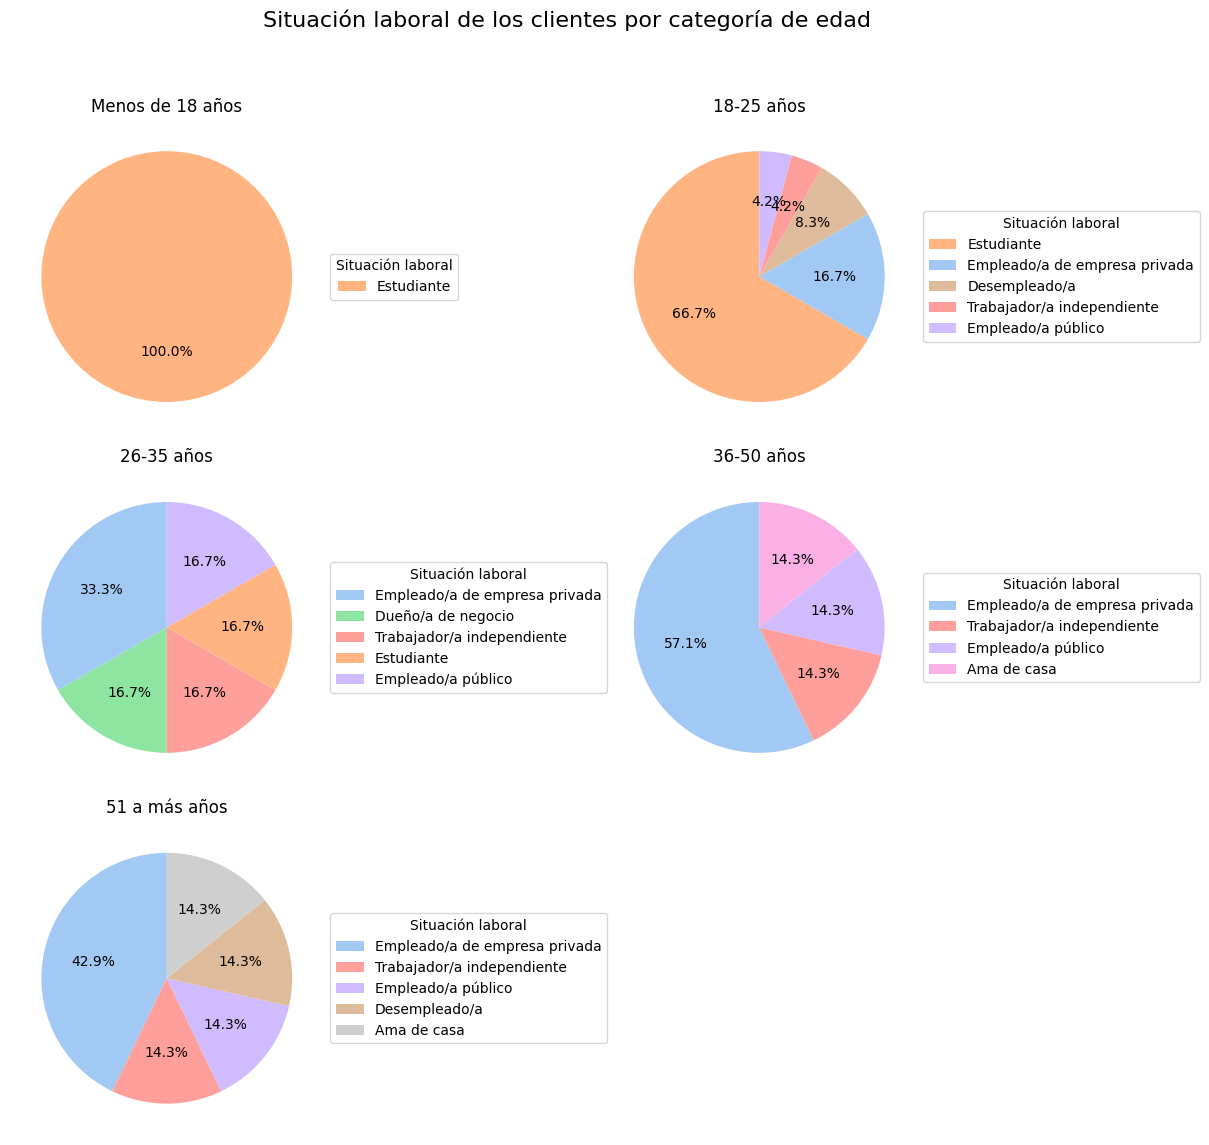

In [47]:
# Visualizar en gráficos circulares la situación laboral de los clientes por categoría de edad
import matplotlib.pyplot as plt
import seaborn as sns

# Definir colores personalizados para las categorías de "sit_laboral"
categorias = df['sit_laboral'].unique()
colores = sns.color_palette("pastel", len(categorias))
color_dict = dict(zip(categorias, colores))

# Función para asignar colores consistentes
def obtener_colores(data):
    return [color_dict[categoria] for categoria in data.index]

# Gráfico de la situación laboral de los clientes por categoría de edad
fig, ax = plt.subplots(3, 2, figsize=(12, 12)) 
fig.suptitle('Situación laboral de los clientes por categoría de edad', fontsize=16)

# Gráfico para la categoría de edad menos de 18
menos_18_counts = df_menos_18['sit_laboral'].value_counts()
menos_18_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[0, 0], startangle=90, colors=obtener_colores(menos_18_counts), labels=None
)
ax[0, 0].set_title('Menos de 18 años')
ax[0, 0].set_ylabel('')
ax[0, 0].legend(menos_18_counts.index, title="Situación laboral", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 18-25
edad_18_25_counts = df_18_25['sit_laboral'].value_counts()
edad_18_25_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[0, 1], startangle=90, colors=obtener_colores(edad_18_25_counts), labels=None
)
ax[0, 1].set_title('18-25 años')
ax[0, 1].set_ylabel('')
ax[0, 1].legend(edad_18_25_counts.index, title="Situación laboral", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 26-35
edad_26_35_counts = df_26_35['sit_laboral'].value_counts()
edad_26_35_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[1, 0], startangle=90, colors=obtener_colores(edad_26_35_counts), labels=None
)
ax[1, 0].set_title('26-35 años')
ax[1, 0].set_ylabel('')
ax[1, 0].legend(edad_26_35_counts.index, title="Situación laboral", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 36-50
edad_36_50_counts = df_36_50['sit_laboral'].value_counts()
edad_36_50_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[1, 1], startangle=90, colors=obtener_colores(edad_36_50_counts), labels=None
)
ax[1, 1].set_title('36-50 años')
ax[1, 1].set_ylabel('')
ax[1, 1].legend(edad_36_50_counts.index, title="Situación laboral", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 51 a más
edad_51_mas_counts = df_51_mas['sit_laboral'].value_counts()
edad_51_mas_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[2, 0], startangle=90, colors=obtener_colores(edad_51_mas_counts), labels=None
)
ax[2, 0].set_title('51 a más años')
ax[2, 0].set_ylabel('')
ax[2, 0].legend(edad_51_mas_counts.index, title="Situación laboral", loc="center left", bbox_to_anchor=(1, 0.5))

# Eliminar el gráfico vacío (ax[2, 1])
ax[2, 1].axis('off')

# Ajustar el diseño del gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

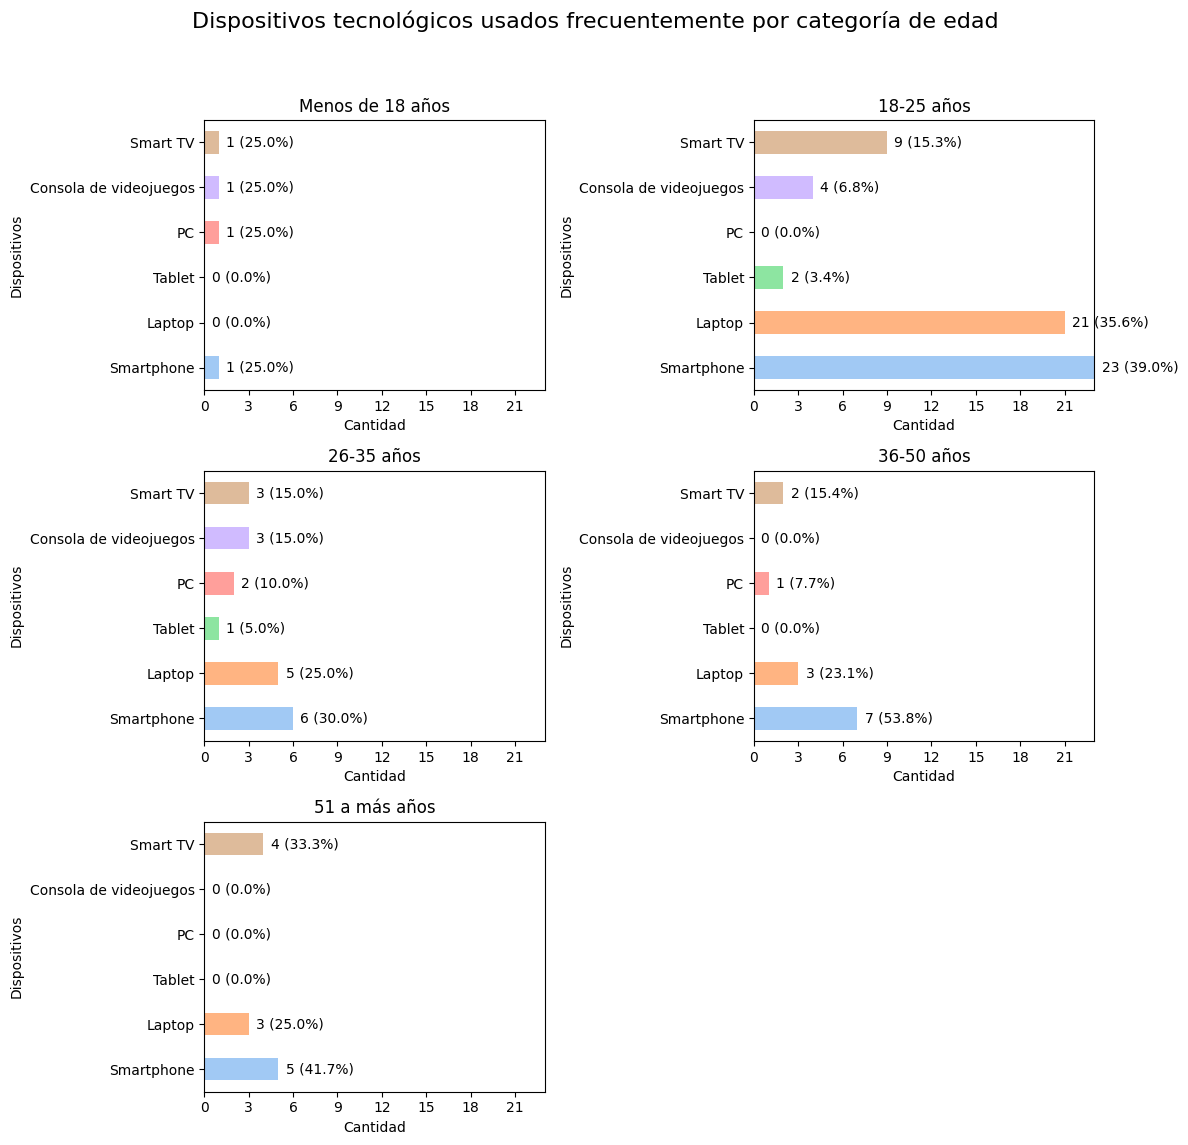

In [60]:
# Visualizar en gráficos de barras horizontales los dispositivos tecnológicos que usan
# frecuentemente los clientes por categoría de edad
from matplotlib.ticker import MaxNLocator

# Definir colores personalizados para los dispositivos
dispositivos = ['Smartphone', 'Laptop', 'Tablet', 'PC', 'Consola de videojuegos', 'Smart TV']
colores_disp = sns.color_palette("pastel", len(dispositivos))
color_dict_disp = dict(zip(dispositivos, colores_disp))

# Función para asignar colores consistentes
def obtener_colores_disp(data):
    return [color_dict_disp[dispositivo] for dispositivo in data.index]

# Crear un DataFrame con la suma de dispositivos por categoría de edad
dispositivos_por_edad = {
    'Menos de 18 años': df_menos_18[dispositivos].sum(),
    '18-25 años': df_18_25[dispositivos].sum(),
    '26-35 años': df_26_35[dispositivos].sum(),
    '36-50 años': df_36_50[dispositivos].sum(),
    '51 a más años': df_51_mas[dispositivos].sum()
}

# Convertir a DataFrame para facilitar el manejo
dispositivos_por_edad_df = pd.DataFrame(dispositivos_por_edad)

# Calcular el valor máximo para establecer el mismo rango en todos los gráficos
max_valor = dispositivos_por_edad_df.max().max()

# Función para agregar etiquetas al final de las barras con valores y porcentajes
def agregar_etiquetas(ax, data):
    total = data.sum()
    for i, valor in enumerate(data):
        porcentaje = (valor / total) * 100 if total > 0 else 0
        ax.text(valor + 0.5, i, f"{int(valor)} ({porcentaje:.1f}%)", va='center', fontsize=10)

# Gráfico de barras horizontales para cada categoría de edad
fig, ax = plt.subplots(3, 2, figsize=(12, 12))  # Cambiar a 3x2 para incluir 5 gráficos
fig.suptitle('Dispositivos tecnológicos usados frecuentemente por categoría de edad', fontsize=16)

# Gráfico para la categoría de edad menos de 18
data = dispositivos_por_edad_df['Menos de 18 años']
data.plot.barh(
    ax=ax[0, 0], color=obtener_colores_disp(data)
)
ax[0, 0].set_title('Menos de 18 años')
ax[0, 0].set_xlabel('Cantidad')
ax[0, 0].set_ylabel('Dispositivos')
ax[0, 0].set_xlim(0, max_valor)
ax[0, 0].xaxis.set_major_locator(MaxNLocator(integer=True))
agregar_etiquetas(ax[0, 0], data)

# Gráfico para la categoría de edad 18-25
data = dispositivos_por_edad_df['18-25 años']
data.plot.barh(
    ax=ax[0, 1], color=obtener_colores_disp(data)
)
ax[0, 1].set_title('18-25 años')
ax[0, 1].set_xlabel('Cantidad')
ax[0, 1].set_ylabel('Dispositivos')
ax[0, 1].set_xlim(0, max_valor)
ax[0, 1].xaxis.set_major_locator(MaxNLocator(integer=True))
agregar_etiquetas(ax[0, 1], data)

# Gráfico para la categoría de edad 26-35
data = dispositivos_por_edad_df['26-35 años']
data.plot.barh(
    ax=ax[1, 0], color=obtener_colores_disp(data)
)
ax[1, 0].set_title('26-35 años')
ax[1, 0].set_xlabel('Cantidad')
ax[1, 0].set_ylabel('Dispositivos')
ax[1, 0].set_xlim(0, max_valor)
ax[1, 0].xaxis.set_major_locator(MaxNLocator(integer=True))
agregar_etiquetas(ax[1, 0], data)

# Gráfico para la categoría de edad 36-50
data = dispositivos_por_edad_df['36-50 años']
data.plot.barh(
    ax=ax[1, 1], color=obtener_colores_disp(data)
)
ax[1, 1].set_title('36-50 años')
ax[1, 1].set_xlabel('Cantidad')
ax[1, 1].set_ylabel('Dispositivos')
ax[1, 1].set_xlim(0, max_valor)
ax[1, 1].xaxis.set_major_locator(MaxNLocator(integer=True))
agregar_etiquetas(ax[1, 1], data)

# Gráfico para la categoría de edad 51 a más
data = dispositivos_por_edad_df['51 a más años']
data.plot.barh(
    ax=ax[2, 0], color=obtener_colores_disp(data)
)
ax[2, 0].set_title('51 a más años')
ax[2, 0].set_xlabel('Cantidad')
ax[2, 0].set_ylabel('Dispositivos')
ax[2, 0].set_xlim(0, max_valor)
ax[2, 0].xaxis.set_major_locator(MaxNLocator(integer=True))
agregar_etiquetas(ax[2, 0], data)

# Eliminar el gráfico vacío (ax[2, 1])
ax[2, 1].axis('off')

# Ajustar el diseño del gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

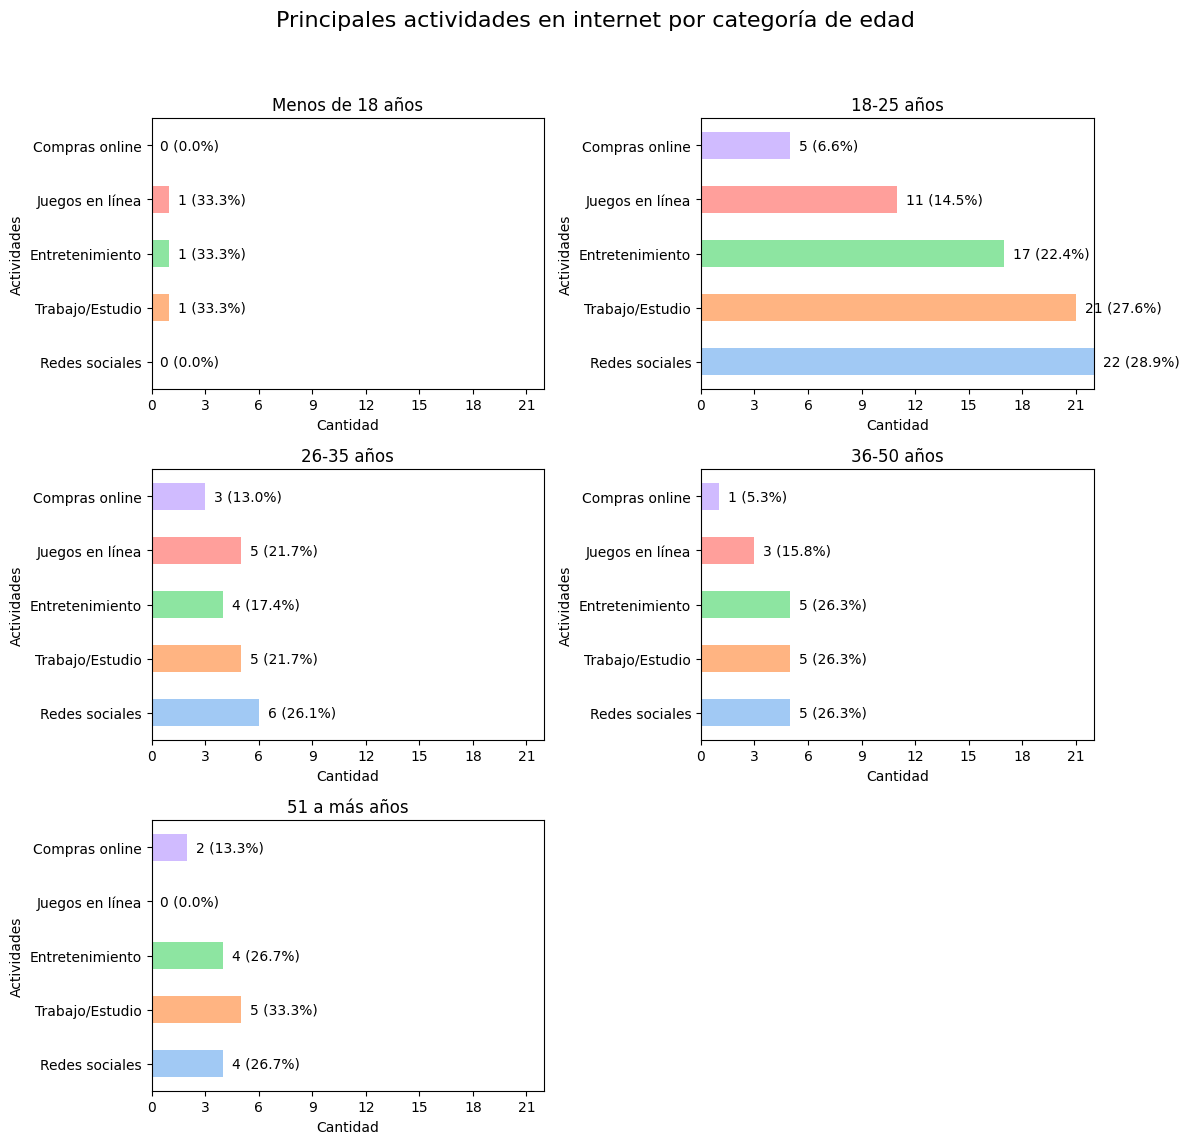

In [59]:
# Visualizar en gráficos de barras horizontales las principales actividades en internet de los 
# clientes por categoría de edad

# Definir colores personalizados para las actividades
actividades = ['Redes sociales', 'Trabajo/Estudio', 'Entretenimiento', 'Juegos en línea', 'Compras online']
colores_actividades = sns.color_palette("pastel", len(actividades))
color_dict_actividades = dict(zip(actividades, colores_actividades))

# Función para asignar colores consistentes
def obtener_colores_actividades(data):
    return [color_dict_actividades[actividad] for actividad in data.index]

# Crear un DataFrame con la suma de actividades por categoría de edad
actividades_por_edad = {
    'Menos de 18 años': df_menos_18[actividades].sum(),
    '18-25 años': df_18_25[actividades].sum(),
    '26-35 años': df_26_35[actividades].sum(),
    '36-50 años': df_36_50[actividades].sum(),
    '51 a más años': df_51_mas[actividades].sum()
}

# Convertir a DataFrame para facilitar el manejo
actividades_por_edad_df = pd.DataFrame(actividades_por_edad)

# Calcular el valor máximo para establecer el mismo rango en todos los gráficos
max_valor = actividades_por_edad_df.max().max()

# Función para agregar etiquetas al final de las barras con valores y porcentajes
def agregar_etiquetas(ax, data):
    total = data.sum()
    for i, valor in enumerate(data):
        porcentaje = (valor / total) * 100 if total > 0 else 0
        ax.text(valor + 0.5, i, f"{int(valor)} ({porcentaje:.1f}%)", va='center', fontsize=10)

# Gráfico de barras horizontales para cada categoría de edad
fig, ax = plt.subplots(3, 2, figsize=(12, 12))  # Cambiar a 3x2 para incluir 5 gráficos
fig.suptitle('Principales actividades en internet por categoría de edad', fontsize=16)

# Gráfico para la categoría de edad menos de 18
data = actividades_por_edad_df['Menos de 18 años']
data.plot.barh(
    ax=ax[0, 0], color=obtener_colores_actividades(data)
)
ax[0, 0].set_title('Menos de 18 años')
ax[0, 0].set_xlabel('Cantidad')
ax[0, 0].set_ylabel('Actividades')
ax[0, 0].set_xlim(0, max_valor)
ax[0, 0].xaxis.set_major_locator(MaxNLocator(integer=True))
agregar_etiquetas(ax[0, 0], data)

# Gráfico para la categoría de edad 18-25
data = actividades_por_edad_df['18-25 años']
data.plot.barh(
    ax=ax[0, 1], color=obtener_colores_actividades(data)
)
ax[0, 1].set_title('18-25 años')
ax[0, 1].set_xlabel('Cantidad')
ax[0, 1].set_ylabel('Actividades')
ax[0, 1].set_xlim(0, max_valor)
ax[0, 1].xaxis.set_major_locator(MaxNLocator(integer=True))
agregar_etiquetas(ax[0, 1], data)

# Gráfico para la categoría de edad 26-35
data = actividades_por_edad_df['26-35 años']
data.plot.barh(
    ax=ax[1, 0], color=obtener_colores_actividades(data)
)
ax[1, 0].set_title('26-35 años')
ax[1, 0].set_xlabel('Cantidad')
ax[1, 0].set_ylabel('Actividades')
ax[1, 0].set_xlim(0, max_valor)
ax[1, 0].xaxis.set_major_locator(MaxNLocator(integer=True))
agregar_etiquetas(ax[1, 0], data)

# Gráfico para la categoría de edad 36-50
data = actividades_por_edad_df['36-50 años']
data.plot.barh(
    ax=ax[1, 1], color=obtener_colores_actividades(data)
)
ax[1, 1].set_title('36-50 años')
ax[1, 1].set_xlabel('Cantidad')
ax[1, 1].set_ylabel('Actividades')
ax[1, 1].set_xlim(0, max_valor)
ax[1, 1].xaxis.set_major_locator(MaxNLocator(integer=True))
agregar_etiquetas(ax[1, 1], data)

# Gráfico para la categoría de edad 51 a más
data = actividades_por_edad_df['51 a más años']
data.plot.barh(
    ax=ax[2, 0], color=obtener_colores_actividades(data)
)
ax[2, 0].set_title('51 a más años')
ax[2, 0].set_xlabel('Cantidad')
ax[2, 0].set_ylabel('Actividades')
ax[2, 0].set_xlim(0, max_valor)
ax[2, 0].xaxis.set_major_locator(MaxNLocator(integer=True))
agregar_etiquetas(ax[2, 0], data)

# Eliminar el gráfico vacío (ax[2, 1])
ax[2, 1].axis('off')

# Ajustar el diseño del gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

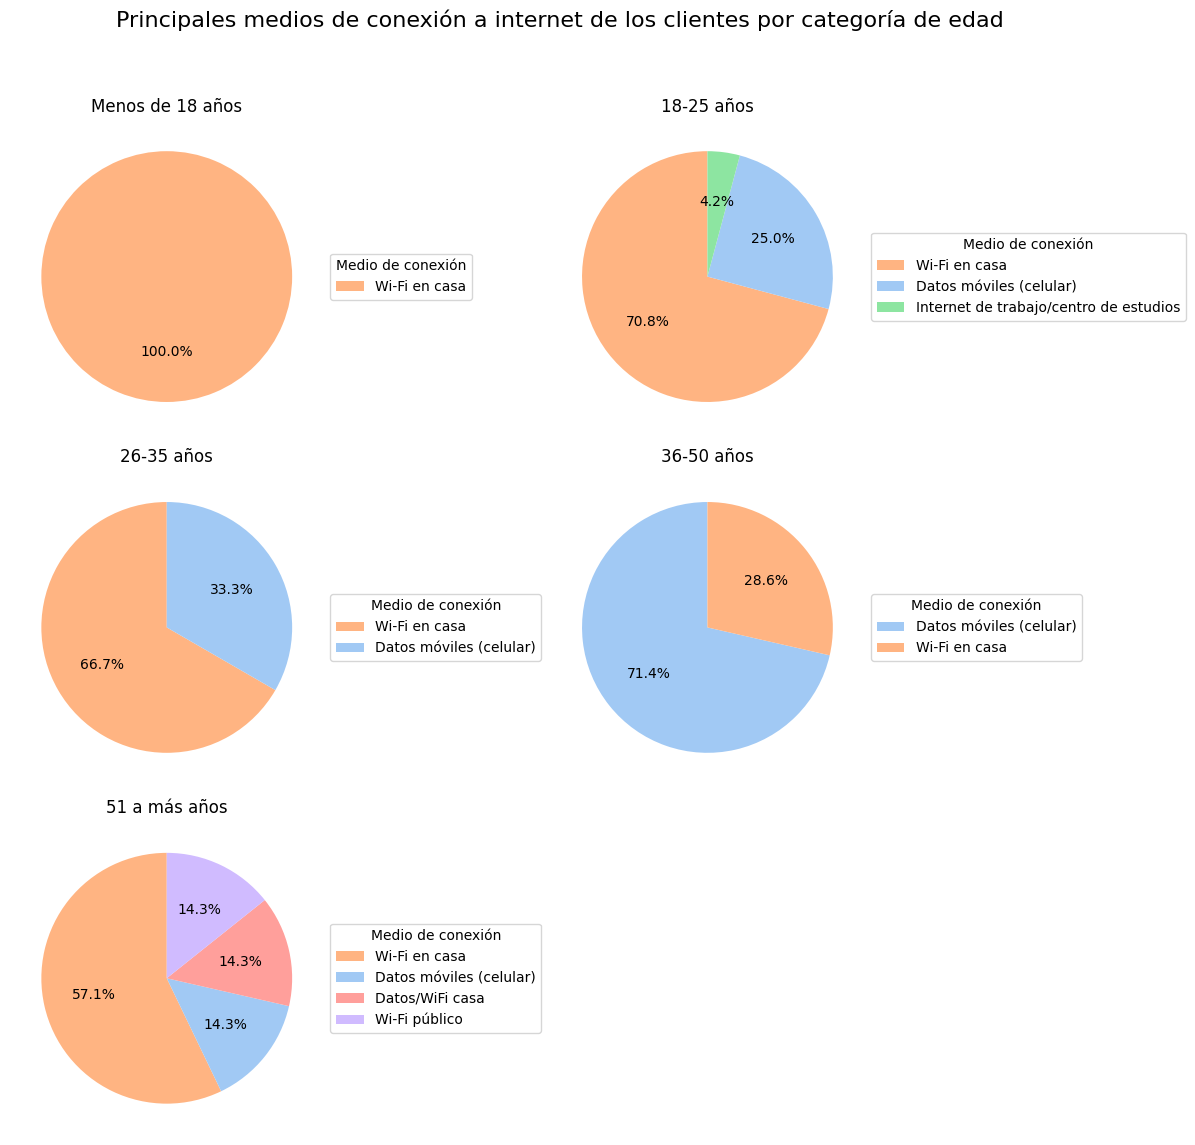

In [55]:
# Visualizar en gráficos circulares el principal medio para conectarse a internet de los 
# clientes por categoría de edad

# Definir colores personalizados para las categorías de "conex_internet"
categorias = df['conex_internet'].unique()
colores = sns.color_palette("pastel", len(categorias))
color_dict = dict(zip(categorias, colores))

# Función para asignar colores consistentes
def obtener_colores(data):
    return [color_dict[categoria] for categoria in data.index]

# Gráfico de los medios principales de conexión de los clientes por categoría de edad
fig, ax = plt.subplots(3, 2, figsize=(12, 12)) 
fig.suptitle('Principales medios de conexión a internet de los clientes por categoría de edad', fontsize=16)

# Gráfico para la categoría Datos móviles (celular)
menos_18_counts = df_menos_18['conex_internet'].value_counts()
menos_18_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[0, 0], startangle=90, colors=obtener_colores(menos_18_counts), labels=None
)
ax[0, 0].set_title('Menos de 18 años')
ax[0, 0].set_ylabel('')
ax[0, 0].legend(menos_18_counts.index, title="Medio de conexión", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 18-25
edad_18_25_counts = df_18_25['conex_internet'].value_counts()
edad_18_25_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[0, 1], startangle=90, colors=obtener_colores(edad_18_25_counts), labels=None
)
ax[0, 1].set_title('18-25 años')
ax[0, 1].set_ylabel('')
ax[0, 1].legend(edad_18_25_counts.index, title="Medio de conexión", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 26-35
edad_26_35_counts = df_26_35['conex_internet'].value_counts()
edad_26_35_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[1, 0], startangle=90, colors=obtener_colores(edad_26_35_counts), labels=None
)
ax[1, 0].set_title('26-35 años')
ax[1, 0].set_ylabel('')
ax[1, 0].legend(edad_26_35_counts.index, title="Medio de conexión", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 36-50
edad_36_50_counts = df_36_50['conex_internet'].value_counts()
edad_36_50_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[1, 1], startangle=90, colors=obtener_colores(edad_36_50_counts), labels=None
)
ax[1, 1].set_title('36-50 años')
ax[1, 1].set_ylabel('')
ax[1, 1].legend(edad_36_50_counts.index, title="Medio de conexión", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 51 a más
edad_51_mas_counts = df_51_mas['conex_internet'].value_counts()
edad_51_mas_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[2, 0], startangle=90, colors=obtener_colores(edad_51_mas_counts), labels=None
)
ax[2, 0].set_title('51 a más años')
ax[2, 0].set_ylabel('')
ax[2, 0].legend(edad_51_mas_counts.index, title="Medio de conexión", loc="center left", bbox_to_anchor=(1, 0.5))

# Eliminar el gráfico vacío (ax[2, 1])
ax[2, 1].axis('off')

# Ajustar el diseño del gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

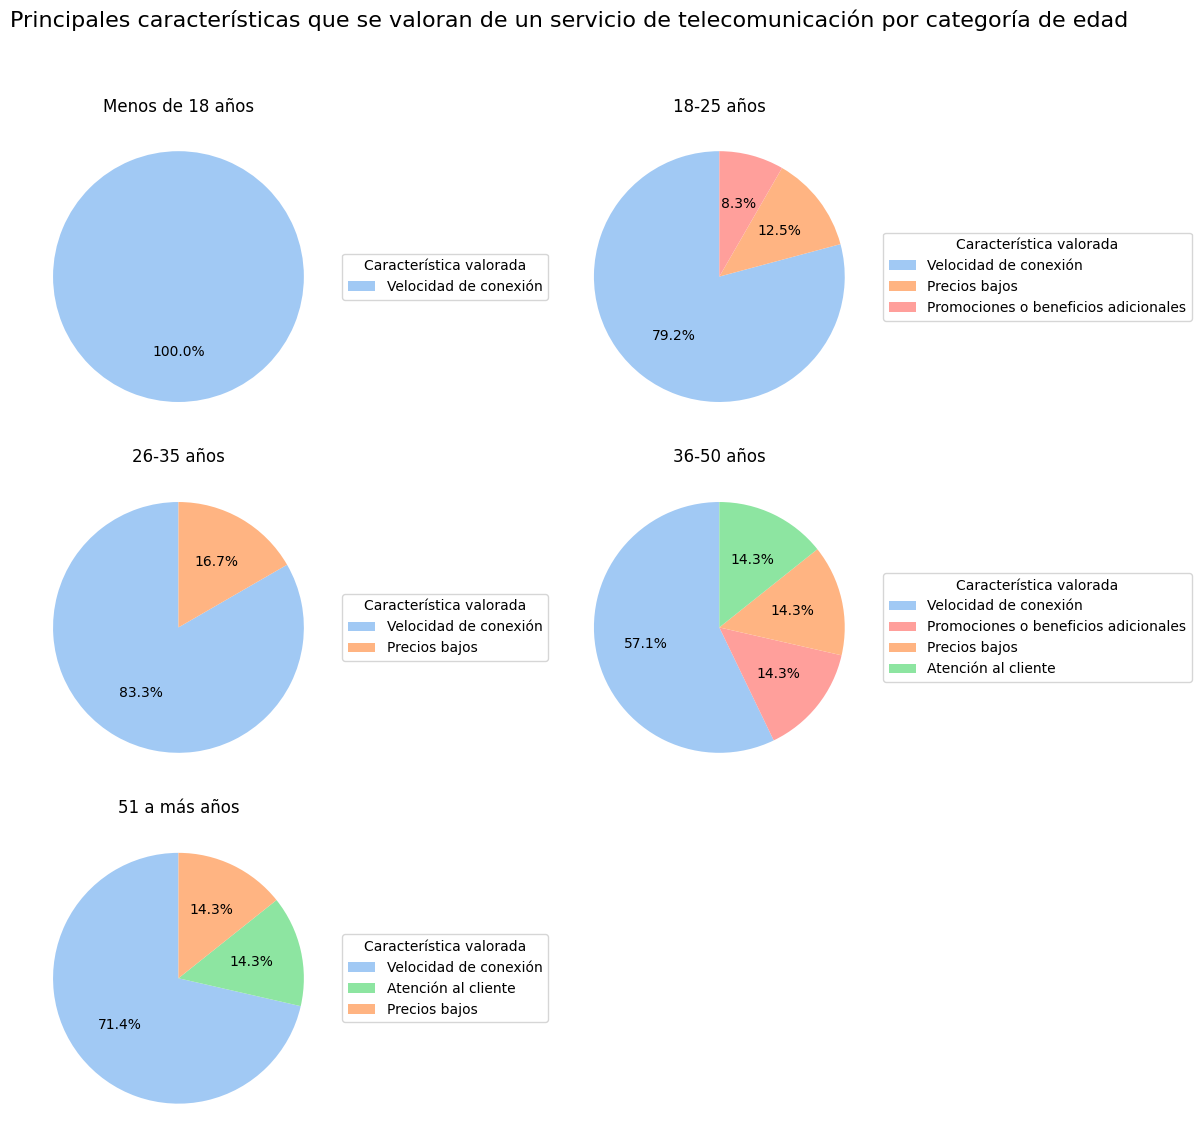

In [ ]:
# Visualizar en gráficos circulares la principal característica que un cliente valora de un 
# servicio de telecomunicación por categoría de edad

# Definir colores personalizados para las categorías de "car_valorada"
categorias = df['car_valorada'].unique()
colores = sns.color_palette("pastel", len(categorias))
color_dict = dict(zip(categorias, colores))

# Función para asignar colores consistentes
def obtener_colores(data):
    return [color_dict[categoria] for categoria in data.index]

# Gráfico de las principales características que valoran de un servicio de telecomunicación los 
# clientes por categoría de edad
fig, ax = plt.subplots(3, 2, figsize=(12, 12)) 
fig.suptitle('Principales características que se valoran de un servicio de telecomunicación por categoría de edad', fontsize=16)

# Gráfico para la categoría Datos móviles (celular)
menos_18_counts = df_menos_18['car_valorada'].value_counts()
menos_18_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[0, 0], startangle=90, colors=obtener_colores(menos_18_counts), labels=None
)
ax[0, 0].set_title('Menos de 18 años')
ax[0, 0].set_ylabel('')
ax[0, 0].legend(menos_18_counts.index, title="Característica valorada", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 18-25
edad_18_25_counts = df_18_25['car_valorada'].value_counts()
edad_18_25_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[0, 1], startangle=90, colors=obtener_colores(edad_18_25_counts), labels=None
)
ax[0, 1].set_title('18-25 años')
ax[0, 1].set_ylabel('')
ax[0, 1].legend(edad_18_25_counts.index, title="Característica valorada", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 26-35
edad_26_35_counts = df_26_35['car_valorada'].value_counts()
edad_26_35_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[1, 0], startangle=90, colors=obtener_colores(edad_26_35_counts), labels=None
)
ax[1, 0].set_title('26-35 años')
ax[1, 0].set_ylabel('')
ax[1, 0].legend(edad_26_35_counts.index, title="Característica valorada", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 36-50
edad_36_50_counts = df_36_50['car_valorada'].value_counts()
edad_36_50_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[1, 1], startangle=90, colors=obtener_colores(edad_36_50_counts), labels=None
)
ax[1, 1].set_title('36-50 años')
ax[1, 1].set_ylabel('')
ax[1, 1].legend(edad_36_50_counts.index, title="Característica valorada", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 51 a más
edad_51_mas_counts = df_51_mas['car_valorada'].value_counts()
edad_51_mas_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[2, 0], startangle=90, colors=obtener_colores(edad_51_mas_counts), labels=None
)
ax[2, 0].set_title('51 a más años')
ax[2, 0].set_ylabel('')
ax[2, 0].legend(edad_51_mas_counts.index, title="Característica valorada", loc="center left", bbox_to_anchor=(1, 0.5))

# Eliminar el gráfico vacío (ax[2, 1])
ax[2, 1].axis('off')

# Ajustar el diseño del gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

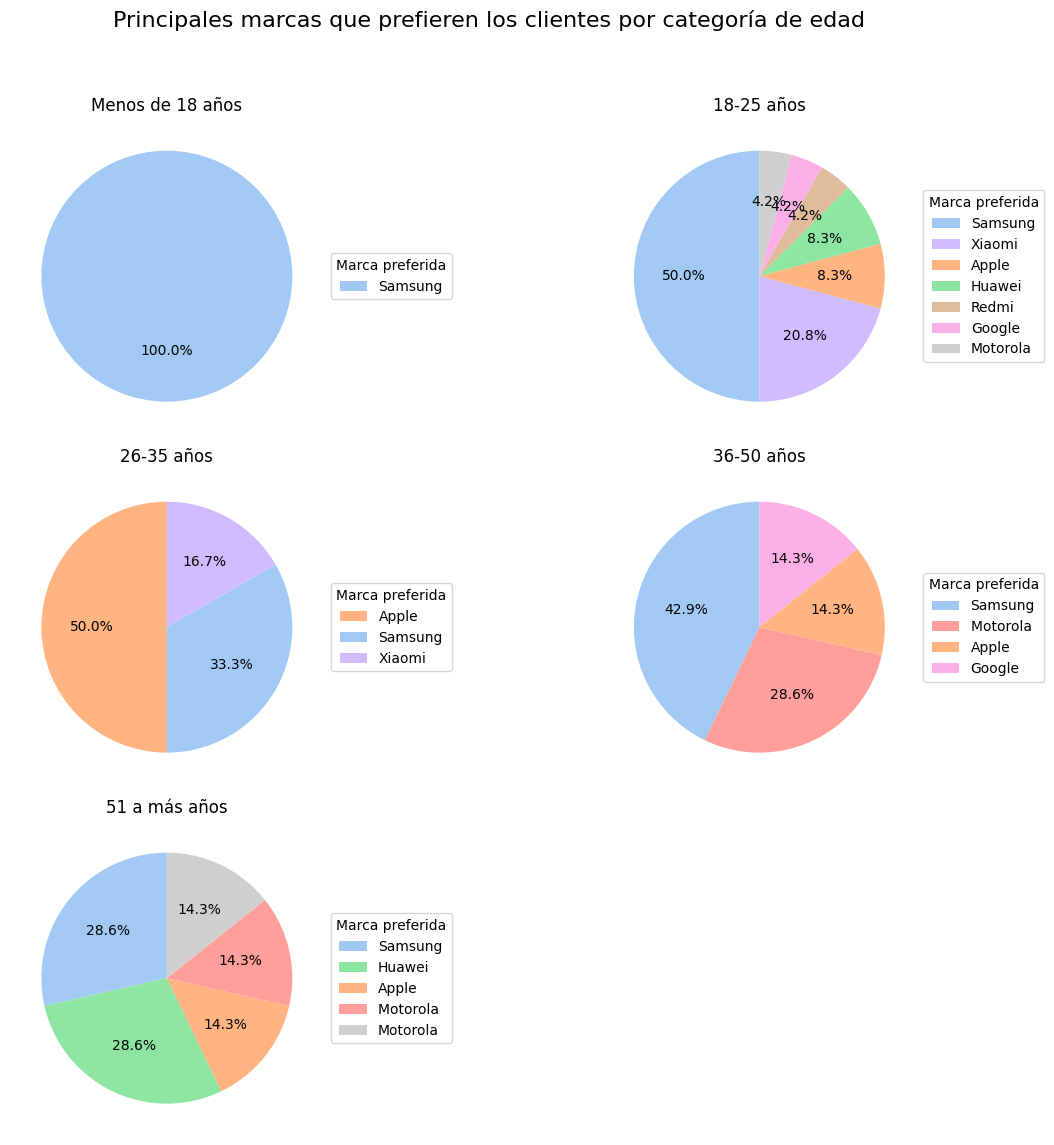

In [57]:
# Visualizar en gráficos circulares las principales marcas que un cliente prefiere por 
# categoría de edad

# Definir colores personalizados para las categorías de "marca_pref"
categorias = df['marca_pref'].unique()
colores = sns.color_palette("pastel", len(categorias))
color_dict = dict(zip(categorias, colores))

# Función para asignar colores consistentes
def obtener_colores(data):
    return [color_dict[categoria] for categoria in data.index]

# Gráfico de las principales marcas que prefiere los clientes por categoría de edad
fig, ax = plt.subplots(3, 2, figsize=(12, 12)) 
fig.suptitle('Principales marcas que prefieren los clientes por categoría de edad', fontsize=16)

# Gráfico para la categoría Datos móviles (celular)
menos_18_counts = df_menos_18['marca_pref'].value_counts()
menos_18_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[0, 0], startangle=90, colors=obtener_colores(menos_18_counts), labels=None
)
ax[0, 0].set_title('Menos de 18 años')
ax[0, 0].set_ylabel('')
ax[0, 0].legend(menos_18_counts.index, title="Marca preferida", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 18-25
edad_18_25_counts = df_18_25['marca_pref'].value_counts()
edad_18_25_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[0, 1], startangle=90, colors=obtener_colores(edad_18_25_counts), labels=None
)
ax[0, 1].set_title('18-25 años')
ax[0, 1].set_ylabel('')
ax[0, 1].legend(edad_18_25_counts.index, title="Marca preferida", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 26-35
edad_26_35_counts = df_26_35['marca_pref'].value_counts()
edad_26_35_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[1, 0], startangle=90, colors=obtener_colores(edad_26_35_counts), labels=None
)
ax[1, 0].set_title('26-35 años')
ax[1, 0].set_ylabel('')
ax[1, 0].legend(edad_26_35_counts.index, title="Marca preferida", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 36-50
edad_36_50_counts = df_36_50['marca_pref'].value_counts()
edad_36_50_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[1, 1], startangle=90, colors=obtener_colores(edad_36_50_counts), labels=None
)
ax[1, 1].set_title('36-50 años')
ax[1, 1].set_ylabel('')
ax[1, 1].legend(edad_36_50_counts.index, title="Marca preferida", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 51 a más
edad_51_mas_counts = df_51_mas['marca_pref'].value_counts()
edad_51_mas_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[2, 0], startangle=90, colors=obtener_colores(edad_51_mas_counts), labels=None
)
ax[2, 0].set_title('51 a más años')
ax[2, 0].set_ylabel('')
ax[2, 0].legend(edad_51_mas_counts.index, title="Marca preferida", loc="center left", bbox_to_anchor=(1, 0.5))

# Eliminar el gráfico vacío (ax[2, 1])
ax[2, 1].axis('off')

# Ajustar el diseño del gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

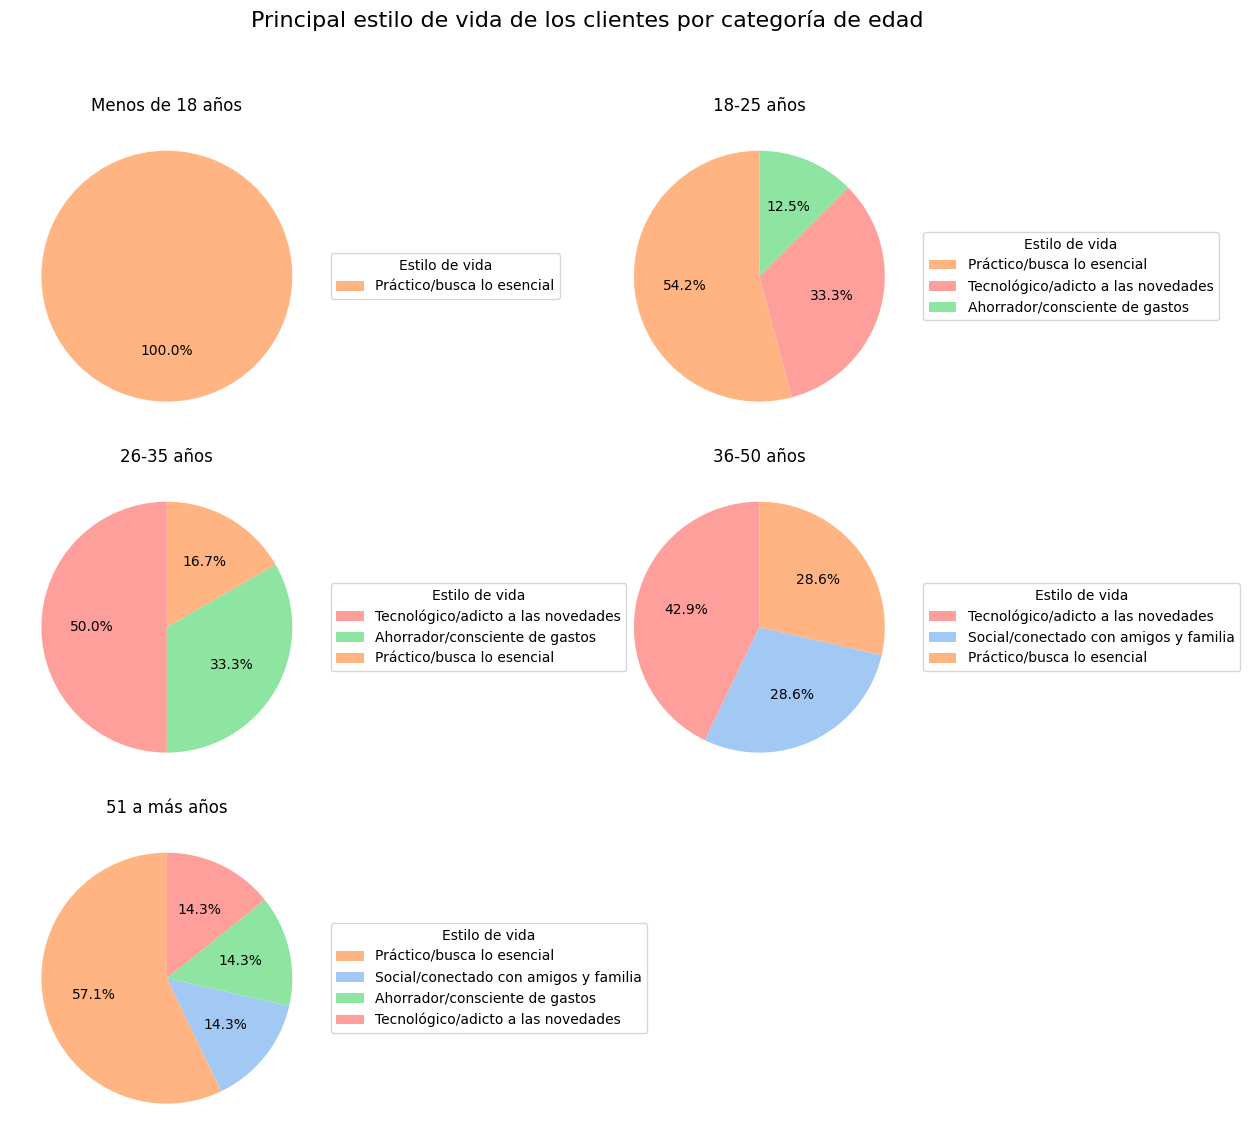

In [58]:
# Visualizar en gráficos circulares el principal estilo de vida que un cliente tiene por 
# categoría de edad

# Definir colores personalizados para las categorías de "est_vida"
categorias = df['est_vida'].unique()
colores = sns.color_palette("pastel", len(categorias))
color_dict = dict(zip(categorias, colores))

# Función para asignar colores consistentes
def obtener_colores(data):
    return [color_dict[categoria] for categoria in data.index]

# Gráfico de las principales estilo de vida de los clientes por categoría de edad
fig, ax = plt.subplots(3, 2, figsize=(12, 12)) 
fig.suptitle('Principal estilo de vida de los clientes por categoría de edad', fontsize=16)

# Gráfico para la categoría Datos móviles (celular)
menos_18_counts = df_menos_18['est_vida'].value_counts()
menos_18_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[0, 0], startangle=90, colors=obtener_colores(menos_18_counts), labels=None
)
ax[0, 0].set_title('Menos de 18 años')
ax[0, 0].set_ylabel('')
ax[0, 0].legend(menos_18_counts.index, title="Estilo de vida", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 18-25
edad_18_25_counts = df_18_25['est_vida'].value_counts()
edad_18_25_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[0, 1], startangle=90, colors=obtener_colores(edad_18_25_counts), labels=None
)
ax[0, 1].set_title('18-25 años')
ax[0, 1].set_ylabel('')
ax[0, 1].legend(edad_18_25_counts.index, title="Estilo de vida", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 26-35
edad_26_35_counts = df_26_35['est_vida'].value_counts()
edad_26_35_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[1, 0], startangle=90, colors=obtener_colores(edad_26_35_counts), labels=None
)
ax[1, 0].set_title('26-35 años')
ax[1, 0].set_ylabel('')
ax[1, 0].legend(edad_26_35_counts.index, title="Estilo de vida", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 36-50
edad_36_50_counts = df_36_50['est_vida'].value_counts()
edad_36_50_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[1, 1], startangle=90, colors=obtener_colores(edad_36_50_counts), labels=None
)
ax[1, 1].set_title('36-50 años')
ax[1, 1].set_ylabel('')
ax[1, 1].legend(edad_36_50_counts.index, title="Estilo de vida", loc="center left", bbox_to_anchor=(1, 0.5))

# Gráfico para la categoría de edad 51 a más
edad_51_mas_counts = df_51_mas['est_vida'].value_counts()
edad_51_mas_counts.plot.pie(
    autopct='%1.1f%%', ax=ax[2, 0], startangle=90, colors=obtener_colores(edad_51_mas_counts), labels=None
)
ax[2, 0].set_title('51 a más años')
ax[2, 0].set_ylabel('')
ax[2, 0].legend(edad_51_mas_counts.index, title="Estilo de vida", loc="center left", bbox_to_anchor=(1, 0.5))

# Eliminar el gráfico vacío (ax[2, 1])
ax[2, 1].axis('off')

# Ajustar el diseño del gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()